In [1]:
import pandas as pd
%matplotlib inline

In [2]:
csv_path = '../views_and_main_tables/markers.csv'
df = pd.read_csv(csv_path)

In [3]:
def show_cols_with(string):
    
    for col in sorted(df.columns):

        if string not in col:
            continue

        print(col)

show_cols_with('year')

accident_year


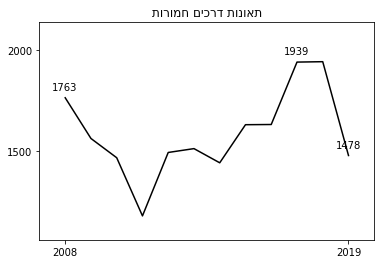

In [4]:
# Query the data

sr = df[df.accident_severity == 2].accident_year.value_counts().sort_index()


# Plot the query results (according to 2017 report)

ax = sr.plot.line(

    title=''.join(reversed('תאונות דרכים חמורות')),
    color='black',
    
    xlim=(
        sr.index[ 0] - 1,
        sr.index[-1] + 1,
    ),
    ylim=(sr.min() * .9, sr.max() * 1.1),
    
    xticks=sr.index[[0, -1]],
    yticks=[1500, 2000],

)


# Annotate the plot

val_range = sr.max() - sr.min()

for year, val in sr[[2008, 2017, 2019]].items():
    ax.annotate(val, xy=(year - .5, val + .05 * val_range));


בהשראת הגרף מדו״ח מגמות 2007-2017 של הרלב״ד, עמוד 11

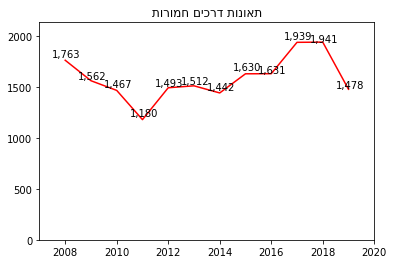

In [5]:
from random import random

# Plot the query results (according to 2018 report)

ax = sr.plot.line(

    title=''.join(reversed('תאונות דרכים חמורות')),
    color='red',
    
    xlim=(
        sr.index[ 0] - 1,
        sr.index[-1] + 1,
    ),
    ylim=(0, sr.max() * 1.1),
    
    xticks=None,
    yticks=list(range(0, int(sr.max() * 1.1), 500)),

)


# Annotate the plot

val_range = sr.max() - sr.min()

for year, val in sr.items():
    ax.annotate(f'{val:,}', xy=(year - .5, val + .05 * random() * val_range));


בהשראת הגרף מדו״ח מגמות 2008-2018 של הרלב״ד, עמוד 25

# הערה חשובה

ראוי לציין שבדו״ח 2017 הכמויות היו גבוהות יותר בכ-20% מהערכים שיצאו כאן,  
ואילו בדו״ח 2018 הכמויות ירדו לערכים שיצאו כאן.  
לא ברור מה הוביל לפער הזה.